<a href="https://colab.research.google.com/github/hkaragah/risk_reliability/blob/main/Monte_Carlo_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Simulation: Resampling

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
p = 0.5 # probability of flipping heads each flip
n = 100 # number of coin flips per trial
x = 45 # random variable indicating the number of heads per trial

## Question
Find the probability that the number of heads in each trial be less than or equal to $x$.<br>

One approach is to use normal distribution CDF. Using this method, we do not consider he continuity crrection that would produce a more accurate answer.

In [12]:
# Analytical approach
mean = n * p
std = math.sqrt(n * p * (1 - p))
cdf = 0.5 * (1 + math.erf((x - mean) / (std * math.sqrt(2))))
print(f'Estimate probability (using normal dist.): {cdf:.3f}')

Estimate probability (using normal dist.): 0.159


Note that the cumulative density function (cdf) for a normal distribution is computed as

$$F(x;\mu, \sigma) = \frac{1}{2}\left[1+erf\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

where $\mu = np$ and $\sigma=\sqrt{np(1-p)}$.

### <u>Error Function</u> (math.erf(...))

The __error function__ (aka. __Gause error function__) is defined as follows:

$$erf(z) = \frac{2}{\sqrt{\pi}} \int_{0}^{z}{e^{-t^2}dt}$$

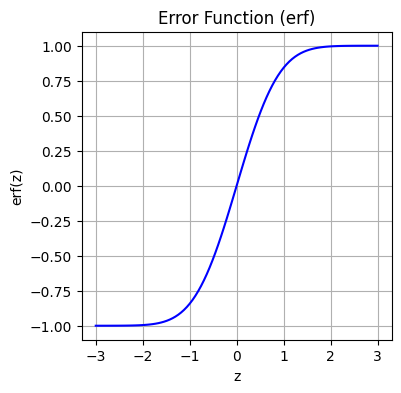

In [5]:
x0 = np.linspace(-3,3,100)
y0 = np.array([math.erf(value) for value in x0])

plt.figure(figsize=(4,4))
plt.plot(x0,y0, color='blue')
plt.title('Error Function (erf)')
plt.xlabel('z')
plt.ylabel('erf(z)')
plt.grid(True)
plt.show()

In [9]:
# Monte Carlo Approach
N = 1000 # number of trails, each with 100 flips
rng = np.random.default_rng() # define new random number generator
simulation = rng.random(size=(n,N)) < p # False for tails, True for heads
counts = np.sum(simulation, axis=0) # sum the number of heads in each trial
proba = np.sum(counts <= x) / N # observation propotion of cases in which count did not exceed 'x'
print(f'Estimated probability (using normal dist.): {proba:.3f} ')

Observation Propotion (using normal dist.): 0.187 


In [11]:
# Binomial distribution approach
proba = binom.cdf(x, n, p)
print(f'Estimate probability (using binomial dist.): {proba:.3f}')

Estimate probability (using binomial dist.): 0.184


Where the binomial distribution has the following form:

$$\sum_{i=0}^{x}{\begin{pmatrix}n\\i\end{pmatrix}p^i(1-p)^{n-i}}$$

It is seen that the probability computed using Monte Carlo simulation is quite close to the exact probability computed using the binomial distribution.